In [140]:
#################################################################################
# Personal Loan Campaign Modelling Project submitted by "Bindu S Pillai" for   ##
# "Supervised Learning" topic of AIML PG Program                               ##
#  condcuted by University of Texas, Austin. Dated - 3/05/2021                  ##
#################################################################################

# Importing necessary libraries for execution of the project.

import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [141]:
file1= "Bank_Personal_Loan_Modelling.csv"
thera_cust = pd.read_csv(file1)
thera_cust.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [142]:
thera_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [143]:
thera_cust.isnull().values.any() 

False

In [144]:
thera_cust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [145]:
thera_cust.shape

(5000, 14)

Insights: 5000 rows and 14 columns. Id column is just serial number of each row of data and it can be dropped. No null values. Data seems clean. Experience does have negative values,  needs to be handled. Education, Personal Loan, Securities Account, CD Account, Online and Credit Card seems to be categorical variables.

In [297]:
thera=thera_cust.drop("ID", axis=1)
thera.columns=thera.columns.str.replace(' ','_')
thera.head()


,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [147]:
print("Number of unique values in each column")
thera_cust.nunique()

Number of unique values in each column


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [148]:
df=thera[thera['Mortgage']==0]
df.head()


,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [149]:
x=df['Mortgage'].count()
print("Number of people with zero mortgage:", x)


Number of people with zero mortgage: 3462


In [150]:
df=thera[thera['CCAvg']==0]
x=df['CCAvg'].count()
print("Number of people with zero credit card spending per month:", x)

Number of people with zero credit card spending per month: 106


In [298]:
## Value counts of all categorical columns.
for i in ['Education','Securities_Account','CD_Account', 'Online','CreditCard', 'Personal_Loan']:
    print(df[i].value_counts())
    print(df[i].value_counts(normalize=True))
    

1    61
3    26
2    19
Name: Education, dtype: int64
1    0.575472
3    0.245283
2    0.179245
Name: Education, dtype: float64
0    95
1    11
Name: Securities_Account, dtype: int64
0    0.896226
1    0.103774
Name: Securities_Account, dtype: float64
0    104
1      2
Name: CD_Account, dtype: int64
0    0.981132
1    0.018868
Name: CD_Account, dtype: float64
1    65
0    41
Name: Online, dtype: int64
1    0.613208
0    0.386792
Name: Online, dtype: float64
0    78
1    28
Name: CreditCard, dtype: int64
0    0.735849
1    0.264151
Name: CreditCard, dtype: float64
0    105
1      1
Name: Personal_Loan, dtype: int64
0    0.990566
1    0.009434
Name: Personal_Loan, dtype: float64


Most Categorical variables are highly imbalanced. This will need to be normalized.

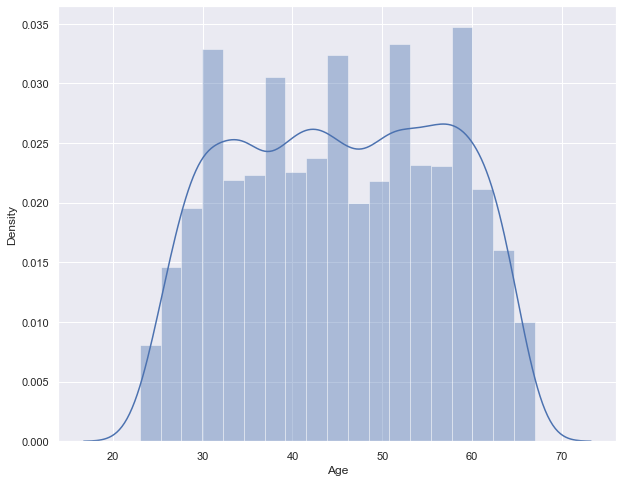

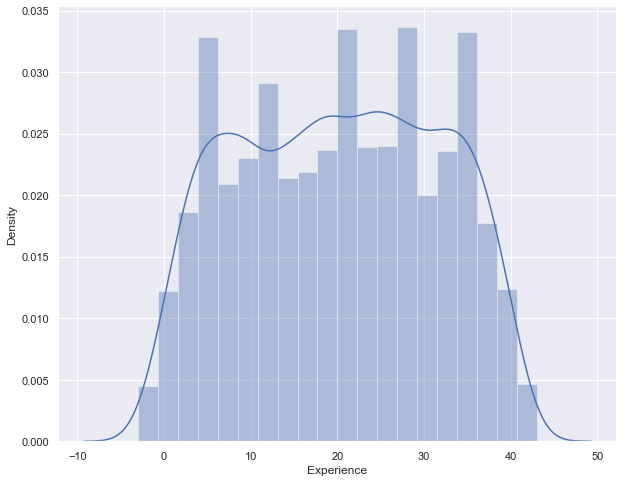

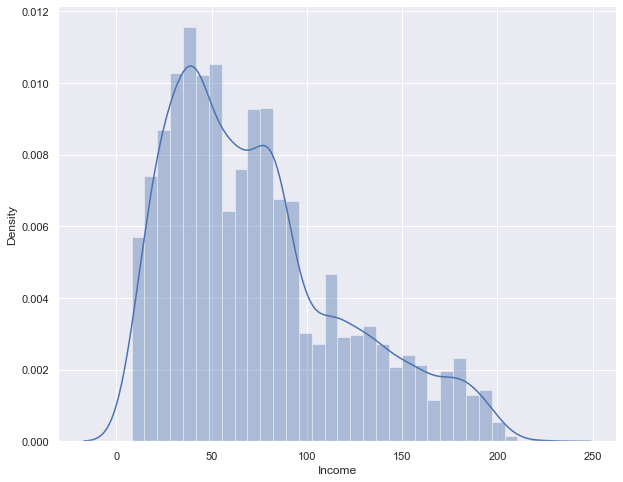

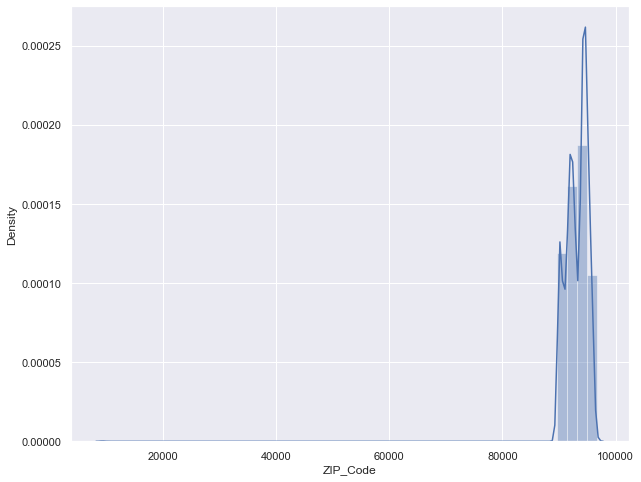

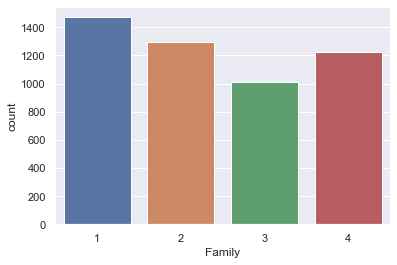

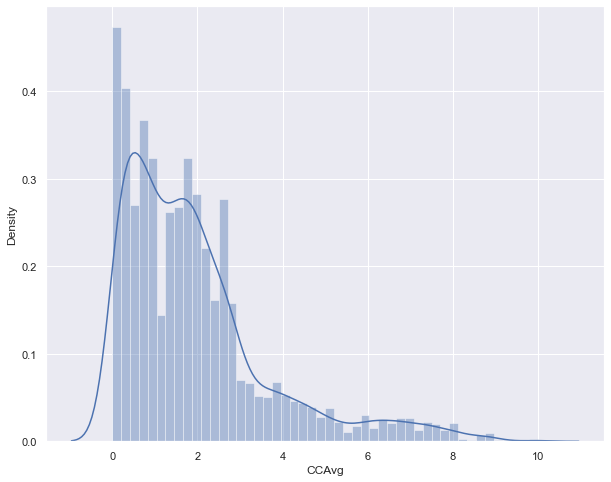

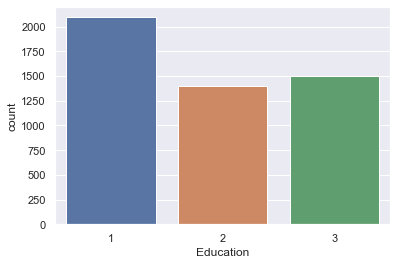

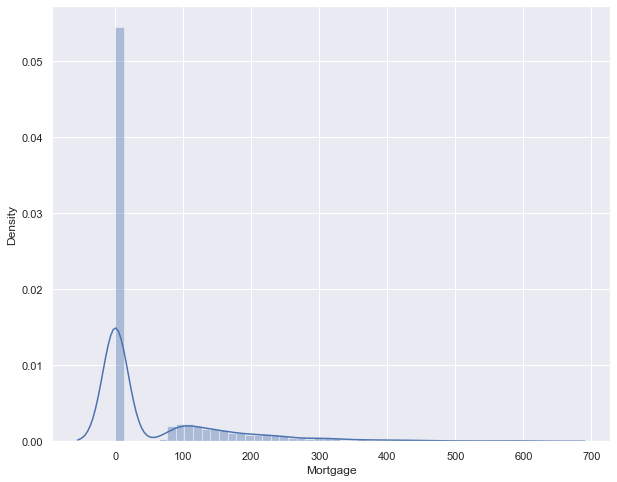

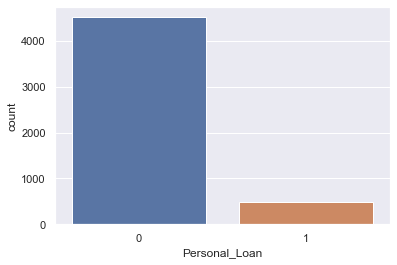

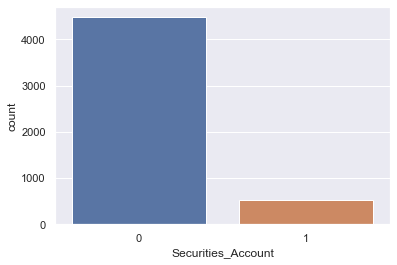

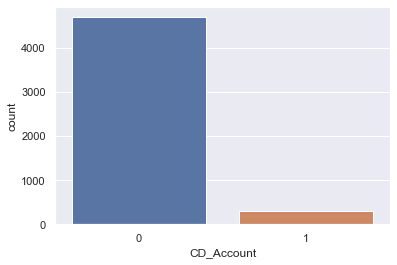

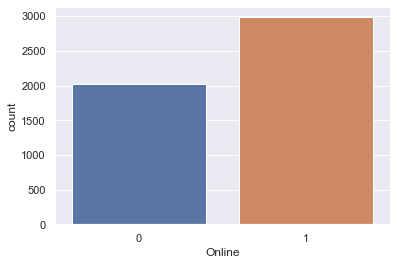

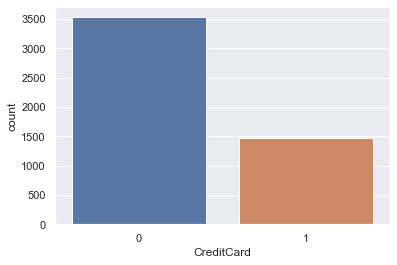

In [152]:
## Univariate Analysis:
import warnings
warnings.filterwarnings('ignore')
for i in thera.columns:
    if i == 'Experience' or i == 'Age'  or i == 'ZIP_Code' or i == 'Income' or i == 'CCAvg'or i == 'Mortgage':
        plt.figure(figsize=(10,8))
        sns.distplot(thera[i])
        plt.show()
    else:
        sns.countplot(x=i,data=thera)
        plt.show()
      

Insights: Most continuous variables are skewed except , age and Experience, but we won't treat it as bank are supposed to have skewed applicants, If we treat the data here it will increase bias

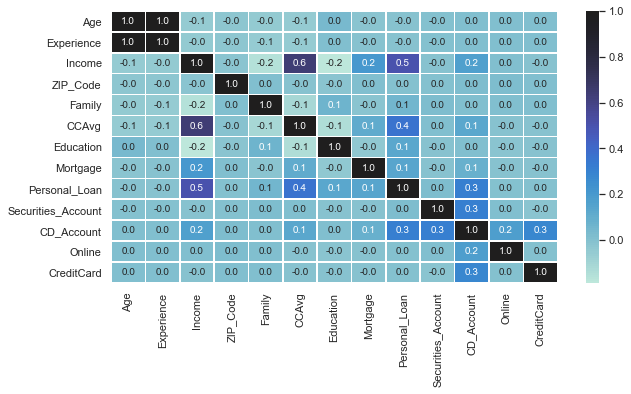

In [154]:
##Bivariate Analysis
plt.figure(figsize=(10,5))
sns.heatmap(thera.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [ ]:
Insights: Income, CCAvg (Credit card spending), CD Account have high correlation with Personal Loan. Others not as much. 
    Income and CCAvg have a high correlation. Zip Code has no correlation to any other features. So can be dropped.
    Age and Experience are highest level of correlation(1). So one can be dropped as it will have same effect on target 
    variable.

In [155]:
pd.crosstab(thera['Education'], thera['Personal_Loan'], normalize='index')

Personal_Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


Insights: People with higher education are more likely to take personal loans.

In [131]:
pd.crosstab(thera['Family'], thera['Personal_Loan'], normalize='index')

Personal_Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


Insights: People with bigger family are more likely to take personal loans.

In [132]:
pd.crosstab(thera['CreditCard'], thera['Personal_Loan'], normalize='index')

Personal_Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


Insights: Having credit card or not makes no difference

In [133]:
pd.crosstab(thera['Securities_Account'], thera['Personal_Loan'], normalize='index')

Personal_Loan,0,1
Securities_Account,,
0,0.906208,0.093792
1,0.885057,0.114943


Insights: People having securities account are slighlty more likely to avail personal loan.

In [134]:
pd.crosstab(thera['CD_Account'], thera['Personal_Loan'], normalize='index')

Personal_Loan,0,1
CD_Account,,
0,0.927629,0.072371
1,0.536424,0.463576


Insights: People having CD account have a 39%  more chance of taking a   personal loan.

In [135]:
pd.crosstab(thera['Online'], thera['Personal_Loan'], normalize='index')

Personal_Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


Insights: Having access to Online banking makes no difference in likelihood of getting a loan.

In [136]:
thera1=thera[['Age', 'Income','Personal_Loan']].copy()
thera1.head()

,Age,Income,Personal_Loan
0,25,49,0
1,45,34,0
2,39,11,0
3,35,100,0
4,35,45,0


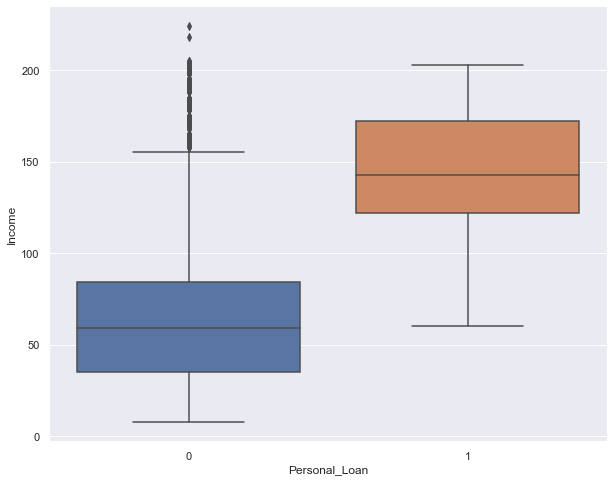

In [137]:
plt.figure(figsize=(10,8))
sns.boxplot(data=thera,x='Personal_Loan',y='Income')
plt.show()

Insights; Many outliers for Income wrt people not availing Personal Loan. Low Income folks do not avail personal loan. Income around 150K plus or minus 25K is income of people availing personal loan.

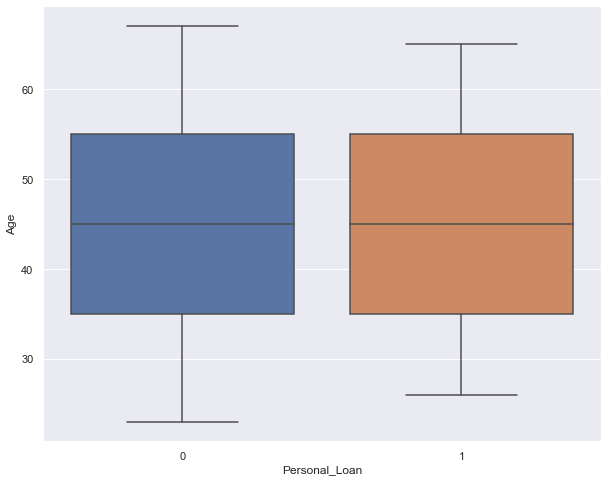

In [156]:
plt.figure(figsize=(10,8))
sns.boxplot(data=thera,x='Personal_Loan',y='Age')
plt.show()

Insights: Agewise it is similar distribution for both 0 and 1 of Target variable(Personal Loan). 35-55 yrs aged people take personal loans.

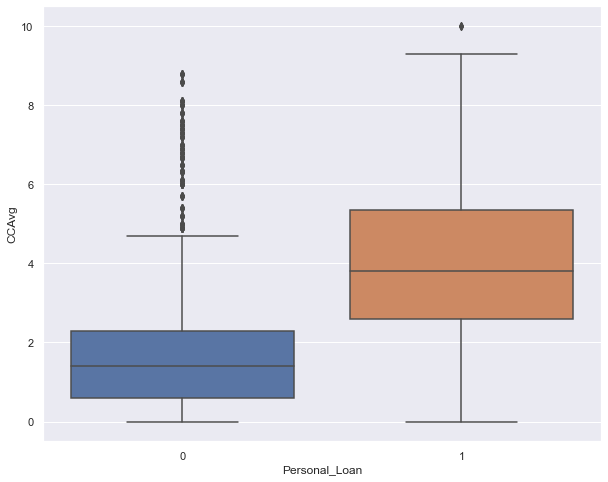

In [168]:
plt.figure(figsize=(10,8))
sns.boxplot(data=thera,x='Personal_Loan',y='CCAvg')
plt.show()

Insights; Many outliers for CCAvg wrt people not avaialing Personal Loan. Those with Low credit card spending do not avail personal loans. 3000 to around 5500 is credit card spending of people availing personal loan.

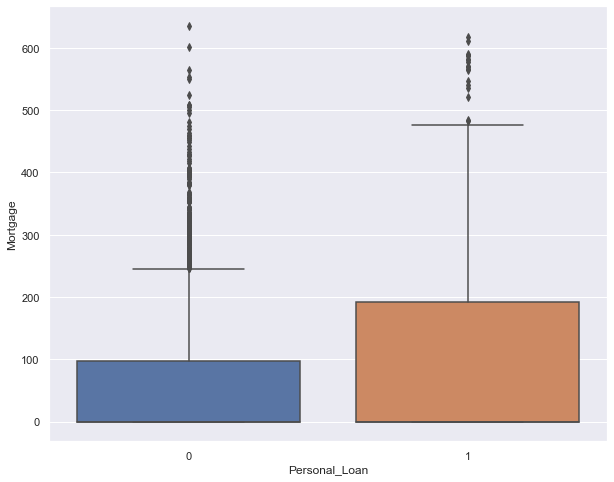

In [299]:
plt.figure(figsize=(10,8))
sns.boxplot(data=thera,x='Personal_Loan',y='Mortgage')
plt.show()

Insight: Morgage has many outliers for both those who take or do not take personal loan.

In [277]:
#Convert X & Y variable to a categorical variable wherever relevant
thera['Personal_Loan'] = thera['Personal_Loan'].astype('category')
thera['Mortgage'] = thera['Mortgage'].astype('category')
thera['Securities_Account'] = thera['Securities_Account'].astype('category')
thera['CD_Account'] = thera['CD_Account'].astype('category')
thera['Online'] = thera['Online'].astype('category')
thera['CreditCard'] = thera['CreditCard'].astype('category')
thera['Education'] = thera['Education'].astype('category')

In [278]:
# Dropping Zip Code as it has no effect on the Target Variable
thera=thera.drop("ZIP_Code", axis=1)
thera.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [279]:
# Dropping Experience as it has high correlation with Age so one of them can be ignored and it has some neagtive values.
thera=thera.drop("Experience", axis=1)
thera.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [280]:
#Normalizing continuous varaiable to improve model performance.

#from sklearn.preprocessing import StandardScaler

#std_scale = StandardScaler()

#std_scale

#thera['Age'] = std_scale.fit_transform(thera[['Age']]) # returns z-scores of the values of the attribute

#thera['Income'] = std_scale.fit_transform(thera[['Income']])

#thera['CCAvg'] = std_scale.fit_transform(thera[['CCAvg']])


from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

thera['Age'] = minmax_scale.fit_transform(thera[['Age']]) 

thera['Income'] = minmax_scale.fit_transform(thera[['Income']])

thera['CCAvg'] = minmax_scale.fit_transform(thera[['CCAvg']])
thera['Mortgage'] = minmax_scale.fit_transform(thera[['Mortgage']])

In [281]:
##Splitting data into training and testing data sets.
X = thera.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = thera['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,0.545455,0.125000,2,0.13,1,0.000000,0,0,1,0
4768,0.340909,0.143519,1,0.20,2,0.000000,0,0,1,0
65,0.818182,0.569444,1,0.38,1,0.000000,0,0,1,1
177,0.136364,0.263889,4,0.18,2,0.384252,0,0,0,0
4489,0.363636,0.060185,3,0.02,2,0.000000,0,0,1,0


In [282]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(thera.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(thera.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [283]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(thera.loc[thera['Personal_Loan'] == 1]), (len(thera.loc[thera['Personal_Loan'] == 1])/len(thera.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(thera.loc[thera['Personal_Loan'] == 0]), (len(thera.loc[thera['Personal_Loan'] == 0])/len(thera.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [284]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=123)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4        5         6  \
0  0.109289  8.558403  0.568689  2.048436  1.351756  0.56851 -0.886645   

          7         8         9  intercept  
0  3.088025 -0.479004 -0.908857 -10.605905  


In [285]:
model_score = model.score(x_test, y_test)
print(model_score)

0.946


In [286]:
model.predict_proba(x_test)

array([[0.95975119, 0.04024881],
       [0.99872574, 0.00127426],
       [0.99794344, 0.00205656],
       ...,
       [0.98977077, 0.01022923],
       [0.99068296, 0.00931704],
       [0.99758328, 0.00241672]])

In [287]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [288]:
# Observe the predicted and observed classes in a dataframe.

z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()


,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Observed Loan Status,Predicted Loan Status
2764,0.181818,0.351852,1,0.29,3,0.165354,0,0,0,1,0,0
4767,0.272727,0.171296,3,0.09,1,0.159055,1,0,0,0,0,0
3814,0.250000,0.125000,3,0.13,1,0.000000,0,0,0,0,0,0
3499,0.590909,0.490741,1,0.03,1,0.450394,0,0,1,0,0,0
2735,0.295455,0.287037,3,0.26,2,0.259843,0,0,1,0,0,0


In [289]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, cmap="YlGnBu", annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.952

Testing accuracy 0.946

Confusion Matrix


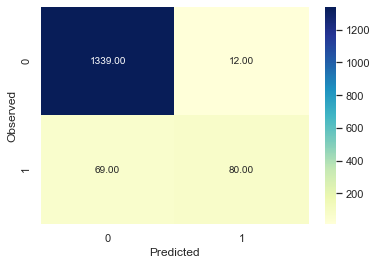

None

Recall: 0.5369127516778524

Precision: 0.8695652173913043

F1 Score: 0.6639004149377593

Roc Auc Score: 0.9521209742721026


In [293]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",metrics.recall_score(y_test,y_predict))
print()
print("Precision:",metrics.precision_score(y_test,y_predict))
print()
print("F1 Score:",metrics.f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",metrics.roc_auc_score(y_test,model.predict_proba(x_test)[:,1] ))

Insights:
Confusion matrix explanation:

True Positive (observed=1,predicted=1):

Predicted that customer will avail the personal loan and the customer did take the loan

False Positive (observed=0,predicted=1):

Predicted that customer will avail the personal loan but the customer did not take the loan

True Negative (observed=0,predicted=0):

Predicted that customer will not avail the personal loan and the customer did not take it.

False Negative (observed=1,predicted=0):

Predicted that customer will not avail the personal loan but the customer did take the loan

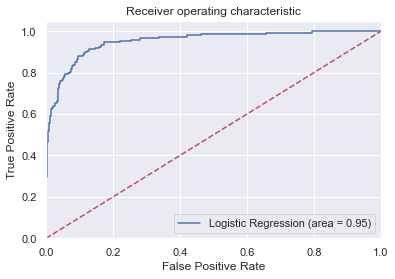

In [295]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,model.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC curve shows, AUC is very high for this model, showing eefectiveness of this model. 

In [296]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np. round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,Income,8.56
7,CD_Account,3.09
3,CCAvg,2.05
4,Education,1.35
9,CreditCard,0.91
6,Securities_Account,0.89
2,Family,0.57
5,Mortgage,0.57
8,Online,0.48
0,Age,0.11


Conclusion:

Important Features:

"Income", "CD Account", "CCAvg", "Education", "Credit Card"
seems to be top 5 features which influence the model's output. Based on the coefficients value.

Age has least coefficient value as 0.11 so this feature doesn't significantly help model in predicting target variable.
Same is true for features, "Family", "Mortgage" and "Online".

Important metric:

Here the bank wants to offer loan to the people who will actually take the loan i.e. less number of False Positive, if FP is high bank would lose money. 

In order for the bank to not lose money on people who are not going to avail the personal loan, FP should be low. Hence Precision is the important metric.

In case of False negative, bank will lose few customers but that okay because it is more important for the bank to save money by not offering loan to customers who are not likely to accept the offer.

After achieving the desired accuracy we can deploy the model for practical use. Bank can use the model for upcoming customers.